In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 

In [82]:
class Model(nn.Module):
    def __init__(self, in_features = 4, h1=8, h2=9, out_features=3):
        super().__init__() 
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x


In [83]:
torch.manual_seed(41)
model = Model()

In [84]:
#obtain the csv / dataset
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [85]:
#change species name to number values
my_df["species"] = my_df["species"].replace("setosa", 0.0)
my_df["species"] = my_df["species"].replace("versicolor", 1.0)
my_df["species"] = my_df["species"].replace("virginica", 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [86]:
#Train test 
x = my_df.drop('species', axis = 1)
y = my_df['species']

In [87]:
#convert to numpy arrays
x = x.values
y = y.values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
#train test split
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state = 41)

In [90]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [91]:
#Set criterion of model to measure error
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [92]:
#Train model
#100 epochs
epoch = 100
losses = []
for i in range(epoch):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    #print every 10th epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    
    #back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636769294739
Epoch: 50 and loss: 0.2676880657672882
Epoch: 60 and loss: 0.17942370474338531
Epoch: 70 and loss: 0.12151695787906647
Epoch: 80 and loss: 0.08601190149784088
Epoch: 90 and loss: 0.06520853191614151


Text(0.5, 0, 'Epoch')

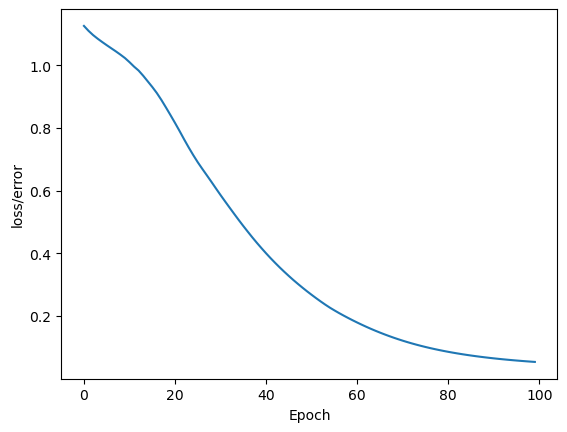

In [93]:
# graph
plt.plot(range(epoch), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [94]:
#evaluate model
#turn back propagation off
with torch.no_grad():
    y_eval = model.forward(x_test) 
    loss = criterion(y_eval, y_test)
    print(loss)

tensor(0.1315)


In [95]:
correct = 0 
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_val = model.forward(data)
  
        print(f'{i+1}.) {str(y_val)} \t Guess: {y_test[i]} \t Real: {y_val.argmax().item() } ')
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'Num of Correct: {correct}')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 Guess: 2 	 Real: 2 
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 Guess: 2 	 Real: 2 
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 Guess: 2 	 Real: 2 
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 Guess: 1 	 Real: 1 
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 Guess: 2 	 Real: 2 
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 Guess: 1 	 Real: 1 
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 Guess: 2 	 Real: 2 
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 Guess: 1 	 Real: 1 
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 Guess: 2 	 Real: 2 
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 Guess: 2 	 Real: 2 
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 Guess: 2 	 Real: 2 
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 Guess: 0 	 Real: 0 
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 Guess: 0 	 Real: 0 
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 Guess: 1 	 Real: 1 
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 Guess: 0 	 Real: 0 
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 Guess: 2 	 Real: 1 
1